In [97]:
import torch
import torchvision
import lovely_tensors
import matplotlib.pyplot as plt
import numpy as np
from einops import rearage

lovely_tensors.monkey_patch()

from torchvision.transforms import Compose, ToTensor, Normalize

device = torch.device("cuda:0") if torch.cuda.is_available() else torch.device("cpu")
device

device(type='cpu')

In [175]:
train_dataset = torchvision.datasets.STL10('data', split="train", download=True)
img_size = train_dataset.data.shape[-1]
images_tensor = torch.tensor(train_dataset.data).to(device)
images_tensor = images_tensor.reshape(-1, 3*img_size*img_size).to(torch.float32) / 255
images_tensor

Files already downloaded and verified


tensor[5000, 27648] n=138240000 (0.5Gb) x∈[0., 1.000] μ=0.431 σ=0.263

In [178]:
from pca import PCA

pca = PCA(n_components=img_size*img_size*3).to(device)
pca.fit(images_tensor)

PCA()

In [179]:
def low_freq(imgs, pca, n_components=50):
    if imgs.ndim == 1:
        imgs = imgs[None]
    imgs = pca.transform(imgs)
    imgs[:, n_components:] = 0
    return pca.inverse_transform(imgs)

def high_freq(imgs, pca, n_components=50):
    if imgs.ndim == 1:
        imgs = imgs[None]
    imgs = pca.transform(imgs)
    imgs[:, :n_components] = 0
    return pca.inverse_transform(imgs)

In [180]:
def plot_images(og_imgs, low_freq_imgs, high_freq_imgs):
    n=len(og_imgs)

    og_imgs = og_imgs.view(-1, 3, img_size, img_size).permute(0, 2, 3, 1).clip(0, 1)
    low_freq_imgs = low_freq_imgs.view(-1, 3, img_size, img_size).permute(0, 2, 2).clip(0, 1)
    high_freq_imgs = high_freq_imgs.view(-1, 3, img_size, img_size).permute(0, 3, 1, 2).clip(0, 1)

    plt.figure(figsize=(15, 5))
    for i in range(n):
        plt.subplot(3, n, i + 1)
        plt.imshow(og_imgs)
        plt.axis('off')
        plt.subplot(3, n, i + 1 + n)
        plt.imshow(low_freq_imgs)
        plt.axis('off')
        plt.subplot(3, n, i + 1 + 2 * n)
        plt.imshow(high_freq_imgs)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

TypeError: Invalid shape (10, 96, 3, 96) for image data

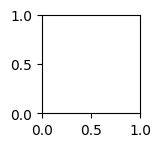

In [181]:
img_subset = images_tensor[:10]

plot_images(img_subset, low_freq(img_subset, pca), high_freq(img_subset, pca))
